<a href="https://colab.research.google.com/github/Dhakal33/Nitrate-Phosphorus-Modeling-in-Cuyahoga-Watershed/blob/main/Nitrate_Forecast_in_Cuyahoga_Watershed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import solar radiation dataset
from google.colab import files
uploaded = files.upload()

Saving GSR.xlsx to GSR.xlsx


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime

In [ ]:
# Read excel file as pandas dataframe
df = pd.read_excel("GSR.xlsx")
df.head()

,Date,Flow,Month,Total Suspended Solids,Total Phosphorus,Soluble Reactive Phosphorus,Nitrite Nitrate,Total Kjeldahl Nitrogen,Chloride
0,1981-11-04,331.0,11,12.3,0.431,0.1907,2.82,0.82,95.3
1,1981-11-05,353.0,11,8.9,0.373,0.1357,2.77,1.06,99.0
2,1981-11-06,821.0,11,181.0,0.800,0.0466,1.65,1.78,75.6
3,1981-11-07,733.0,11,36.9,0.340,0.0927,1.57,0.91,91.5
4,1981-11-08,603.0,11,31.3,0.285,0.0272,1.57,1.10,89.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11996 entries, 0 to 11995
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         11996 non-null  datetime64[ns]
 1   Flow                         11996 non-null  float64       
 2   Month                        11996 non-null  int64         
 3   Total Suspended Solids       11996 non-null  float64       
 4   Total Phosphorus             11996 non-null  float64       
 5   Soluble Reactive Phosphorus  11996 non-null  float64       
 6   Nitrite Nitrate              11996 non-null  float64       
 7   Total Kjeldahl Nitrogen      11996 non-null  float64       
 8   Chloride                     11996 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 843.6 KB


In [ ]:
features_considered=['Flow','Month','Nitrite Nitrate']
dataset = df[features_considered]
dataset.index = df['Date']
dataset.head()

,Flow,Month,Nitrite Nitrate
Date,,,
1981-11-04,331.0,11,2.82
1981-11-05,353.0,11,2.77
1981-11-06,821.0,11,1.65
1981-11-07,733.0,11,1.57
1981-11-08,603.0,11,1.57


In [ ]:
dataset.index = df['Date']
dataset.head()

,Flow,Month,Nitrite Nitrate
Date,,,
1981-11-04,331.0,11,2.82
1981-11-05,353.0,11,2.77
1981-11-06,821.0,11,1.65
1981-11-07,733.0,11,1.57
1981-11-08,603.0,11,1.57


In [ ]:
# Labels are the values we want to predict
labels = np.array(dataset['Nitrite Nitrate'])

# Remove the labels from the features
# axis 1 refers to the columns
features = dataset.drop('Nitrite Nitrate', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 123)

In [ ]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (8397, 2)
Training Labels Shape: (8397,)
Testing Features Shape: (3599, 2)
Testing Labels Shape: (3599,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 123)

# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.5 degrees.


In [ ]:
print(errors.shape)

(3599,)


<ipython-input-50-0f5038ea1b7c>:15: RuntimeWarning: divide by zero encountered in divide
  train_err=abs((test_labels-predictions)/test_labels)*100
<ipython-input-50-0f5038ea1b7c>:18: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_err['Training Error'],shade=True,color='r',kernel='gau',ax=axs[1])
<ipython-input-50-0f5038ea1b7c>:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_err['Training Error'],shade=True,color='r',kernel='gau',ax=axs[1])


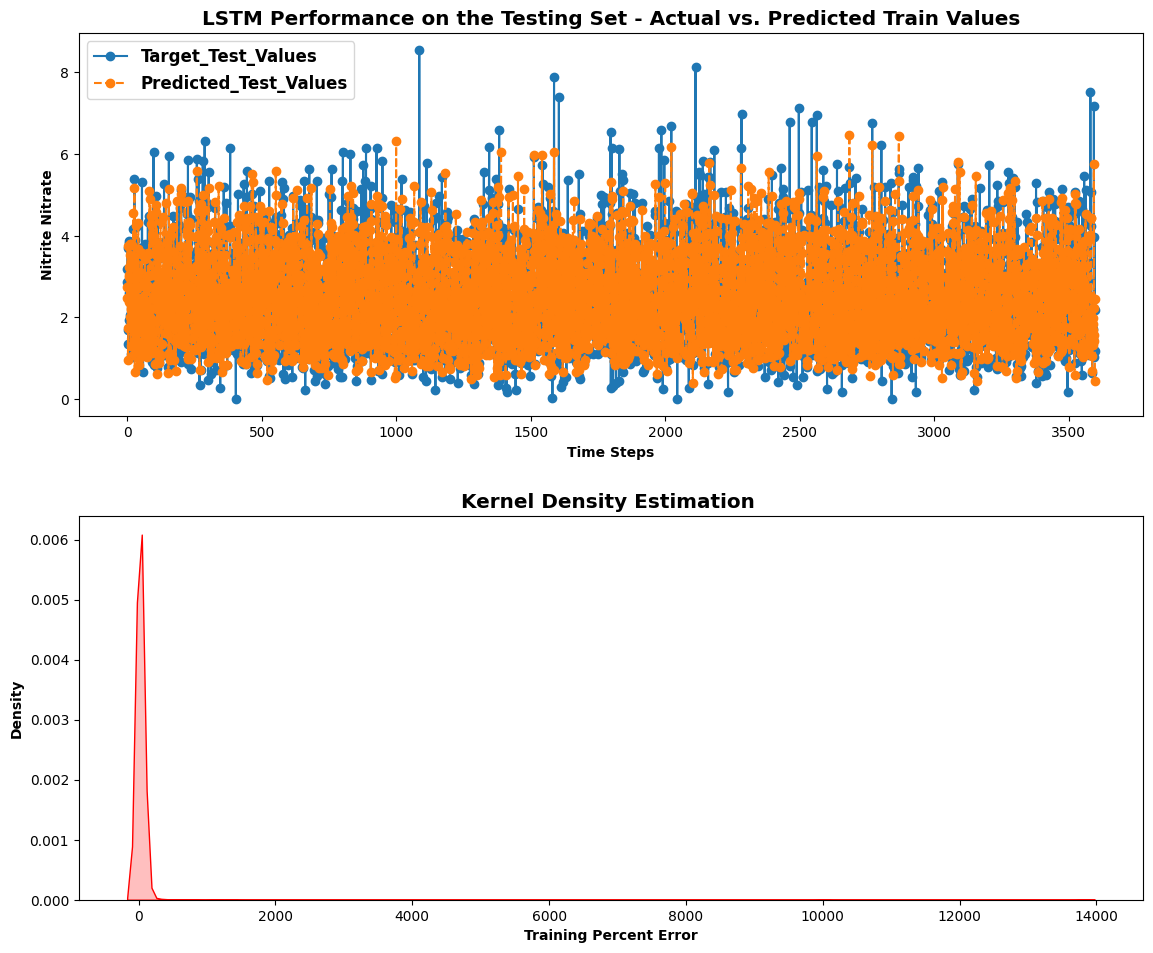

In [ ]:
#'LSTM Performance on the training set - Actual vs. Predicted Values'
fig,axs=plt.subplots(2,1,figsize=(12,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12

axs[0].plot(test_labels,marker='o',linestyle='-',label='Target_Test_Values')

axs[0].plot(predictions,marker='o',linestyle='dashed',label='Predicted_Test_Values')
axs[0].set_title('LSTM Performance on the Testing Set - Actual vs. Predicted Train Values',fontweight='bold')
axs[0].legend()
axs[0].set_xlabel('Time Steps',fontweight='bold')
axs[0].set_ylabel('Nitrite Nitrate',fontweight='bold');

# Training percent error distribution plot
train_err=abs((test_labels-predictions)/test_labels)*100
train_err=pd.DataFrame(train_err,columns=['Training Error'])

sns.kdeplot(train_err['Training Error'],shade=True,color='r',kernel='gau',ax=axs[1])
axs[1].set_xlabel('Training Percent Error',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold');
axs[1].set_title('Kernel Density Estimation ',fontweight='bold')
for ax in axs.flat:
    ax.figure.tight_layout(pad=2);

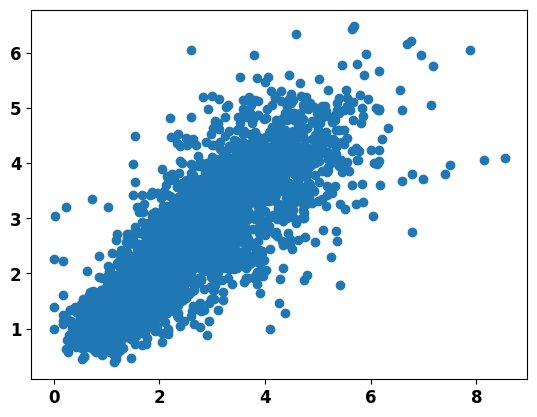

In [ ]:
plt.scatter(test_labels,predictions)

In [ ]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

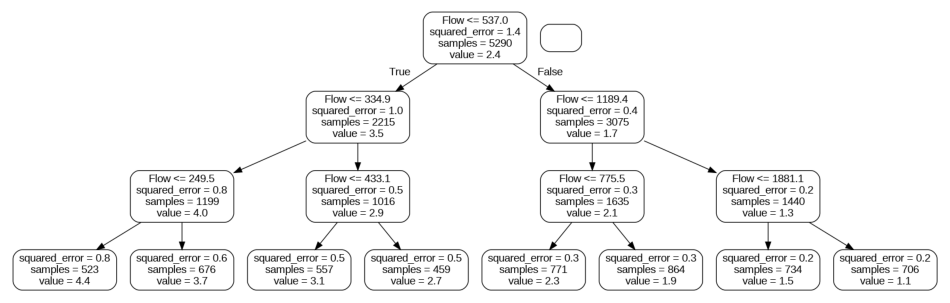

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12, 6))

# Remove the axes
ax.axis('off')

plt.imshow(plt.imread('small_tree.png'))

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Flow                 Importance: 0.94
Variable: Month                Importance: 0.06


In [ ]:
# Import support vector regressor
from sklearn.svm import SVR

SVRegressor = SVR(kernel='rbf')

# Train the model on training data
SVRegressor.fit(train_features, train_labels);

In [ ]:
# Use the forest's predict method on the test data
SVR_predictions = SVRegressor.predict(test_features)

# Calculate the absolute errors
SVR_errors = abs(SVR_predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(SVR_errors), 2), 'degrees.')

Mean Absolute Error: 0.47 degrees.


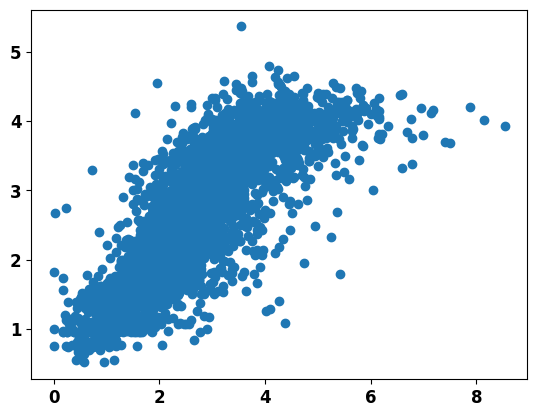

In [ ]:
plt.scatter(test_labels,SVR_predictions)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(test_labels,predictions))
print(r2_score(test_labels,SVR_predictions))


print(np.sqrt(((predictions - test_labels) ** 2).mean()))
print(np.sqrt(((SVR_predictions - test_labels) ** 2).mean()))

0.6842152077812733
0.7053324968038468
0.6913895014300643
0.6678720926605377
